# p.240

# 논리합을 수행하는 퍼셉트론

In [12]:
import numpy as np

W, b = np.array([0, 0]), 0
learning_rate = 0.01

In [13]:
def activation(s):
    if s > 0: return 1
    elif s < 0: return -1
    return 0

def out(x):
    return activation(W.dot(x) + b)  # == W[0]*x[0] + W[1]*x[1] + b

def train(x0, x1, target):  # target은 정답
    global W, b
    X = np.array([x0, x1])
    y = out(X)

    if target == y: return False  # 정답이면 학습할 필요 없음
    else:
        print('가중치 수정전 target :{}, y:{}, b:{}, W:{}'.format(target, y, b, W))
        W = W + learning_rate * X * target 
        b = b + learning_rate * 1 * target 
        print('가중치 수정후 target :{}, y:{}, b:{}, W:{}'.format(target, y, b, W))
        return True

def predict(inputs):
    outputs = []
    for x in inputs:
        outputs.append(out(x))
    return outputs

In [7]:
adjusted = 0
for i in range(100):
    adjusted += train(-1,-1,-1)
    adjusted += train(-1, 1, 1)
    adjusted += train( 1,-1, 1)
    adjusted += train( 1, 1, 1)
    print('iteration ---------', i)
    if not adjusted: break
    adjusted = 0 # 다음 for문을 위해 초기화

가중치 수정전 target :-1, y:0, b:0, W:[0 0]
가중치 수정후 target :-1, y:0, b:-0.01, W:[0.01 0.01]
가중치 수정전 target :1, y:-1, b:-0.01, W:[0.01 0.01]
가중치 수정후 target :1, y:-1, b:0.0, W:[0.   0.02]
가중치 수정전 target :1, y:-1, b:0.0, W:[0.   0.02]
가중치 수정후 target :1, y:-1, b:0.01, W:[0.01 0.01]
iteration --------- 0
iteration --------- 1


In [11]:
X = [[-1,-1], [-1,1], [1,-1], [1,1]]
predict(X)

[-1, 1, 1, 1]

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def predict_(inputs):
    outputs = []
    for x in inputs:
        outputs.append(out(x))
    return np.array(outputs)

def plot_decision_regions_percept(X, y, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = predict_(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    plt.legend()
    plt.show()

In [27]:
def train_plot(x0, x1, target, X_plot, y_plot):  # target은 정답
    global W, b
    X = np.array([x0, x1])
    y = out(X)

    plot_decision_regions_percept(X=X_plot, y=y_plot)

    if target == y: return False  # 정답이면 학습할 필요 없음
    else:
        print('가중치 수정전 target :{}, y:{}, b:{}, W:{}'.format(target, y, b, W))
        W = W + learning_rate * X * target 
        b = b + learning_rate * 1 * target 
        print('가중치 수정후 target :{}, y:{}, b:{}, W:{}'.format(target, y, b, W))
        return True

C:\Users\PC\AppData\Local\Temp\ipykernel_10368\3282799369.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_10368\3282799369.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


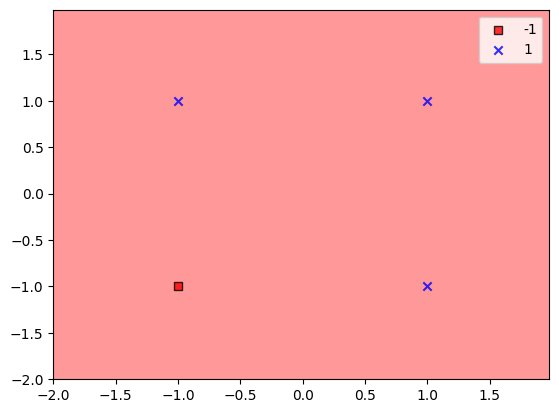

가중치 수정전 target :-1, y:0, b:0, W:[0 0]
가중치 수정후 target :-1, y:0, b:-0.01, W:[0.01 0.01]


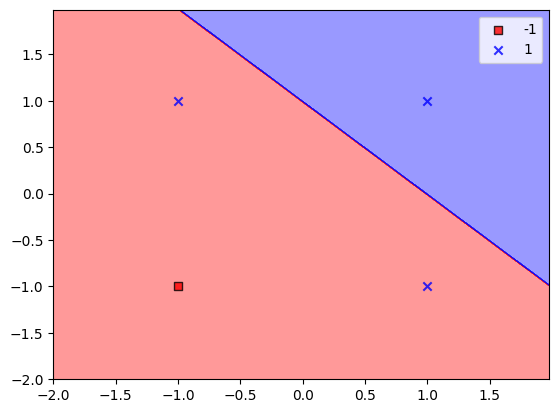

가중치 수정전 target :1, y:-1, b:-0.01, W:[0.01 0.01]
가중치 수정후 target :1, y:-1, b:0.0, W:[0.   0.02]


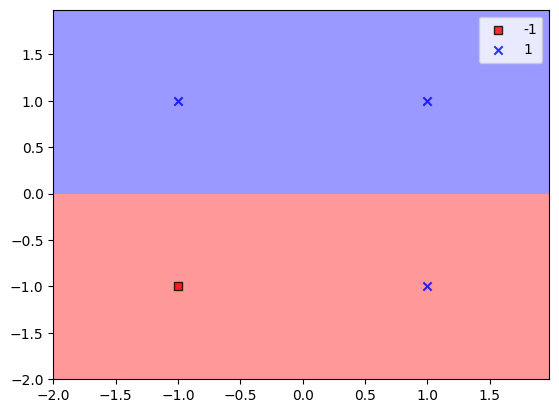

가중치 수정전 target :1, y:-1, b:0.0, W:[0.   0.02]
가중치 수정후 target :1, y:-1, b:0.01, W:[0.01 0.01]


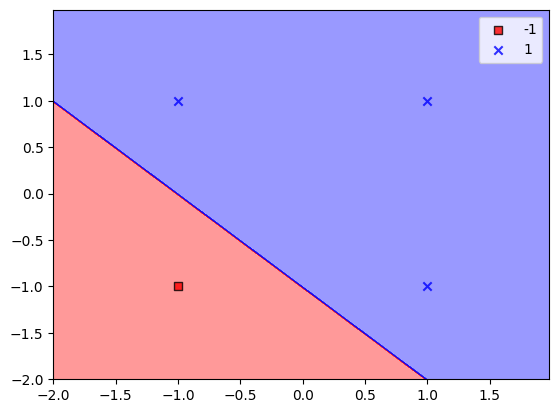

iteration --------- 0


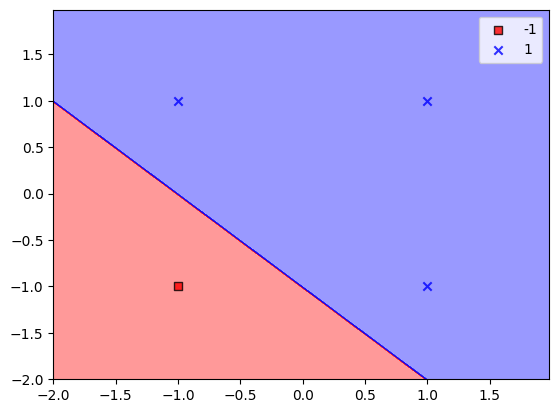

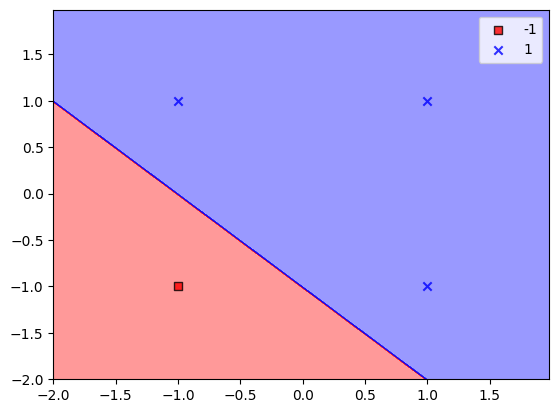

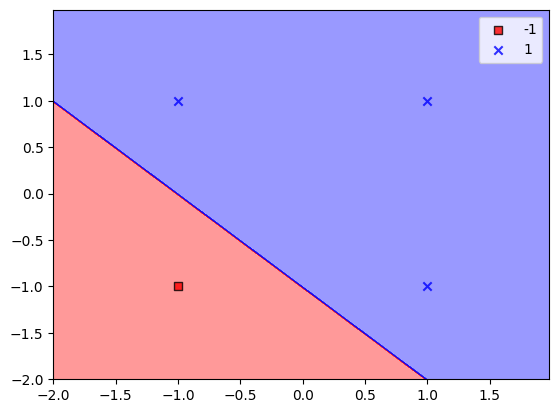

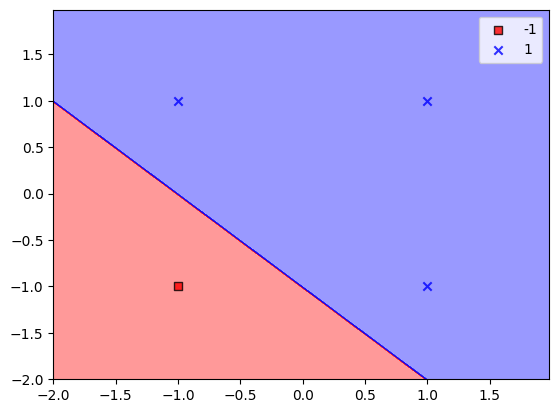

iteration --------- 1


In [29]:
W = np.array([0, 0])
b = 0
X_plot=np.array([[-1, -1],
            [-1, 1],
            [1, -1],
            [1, 1]])
y_plot=np.array([-1, 1, 1, 1]) # 논리합은 -1, 1, 1, 1

adjusted = 0
for i in range(100):
    adjusted += train_plot(-1,-1,-1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train_plot(-1, 1, 1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train_plot( 1,-1, 1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train_plot( 1, 1, 1, X_plot=X_plot, y_plot=y_plot)
    print('iteration ---------', i)
    if not adjusted: break
    adjusted = 0 # 다음 for문을 위해 초기화

# AND gate 논리곱

C:\Users\PC\AppData\Local\Temp\ipykernel_10368\3282799369.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_10368\3282799369.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


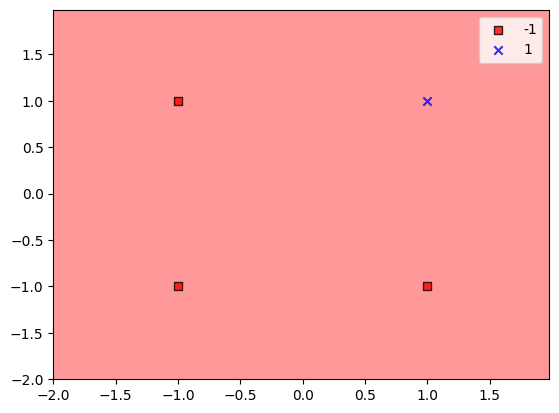

가중치 수정전 target :-1, y:0, b:0, W:[0 0]
가중치 수정후 target :-1, y:0, b:-0.01, W:[0.01 0.01]


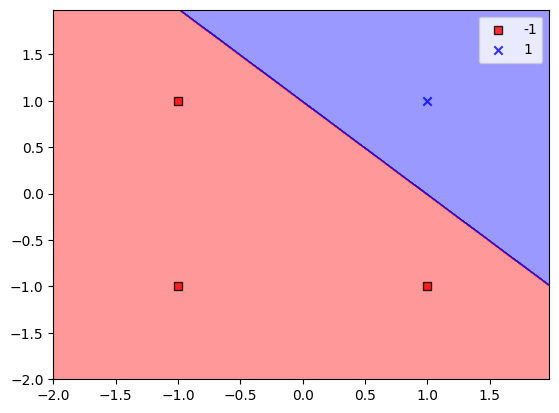

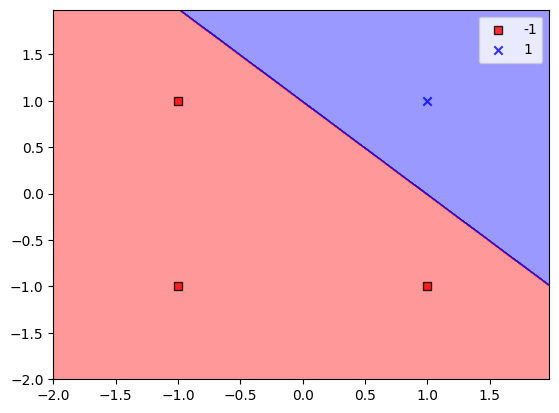

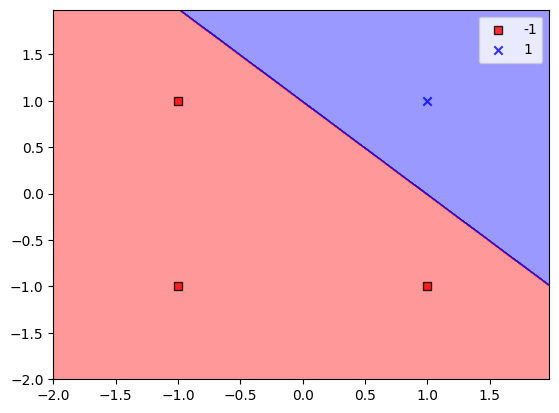

iteration --------- 0


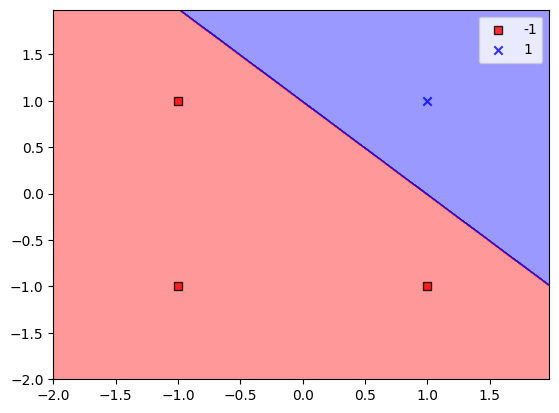

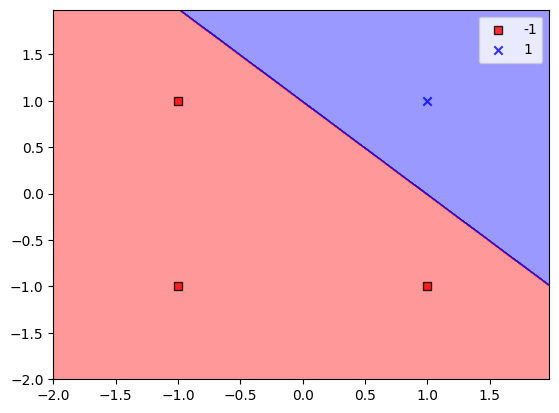

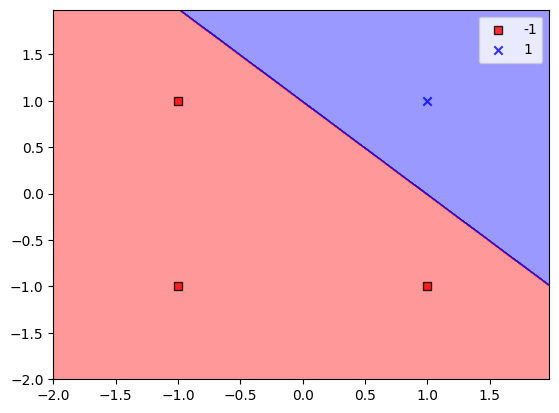

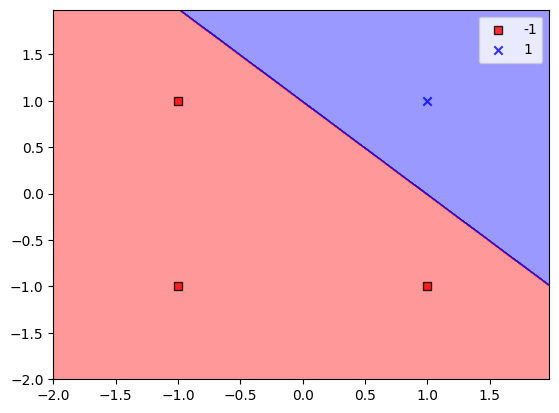

iteration --------- 1


In [30]:
W = np.array([0, 0])
b = 0
X_plot=np.array([[-1, -1],
            [-1, 1],
            [1, -1],
            [1, 1]])
y_plot=np.array([-1, -1, -1, 1]) # 논리합은 -1, 1, 1, 1

adjusted = 0
for i in range(100):
    adjusted += train_plot(-1,-1, -1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train_plot(-1, 1, -1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train_plot( 1,-1, -1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train_plot( 1, 1, 1, X_plot=X_plot, y_plot=y_plot)
    print('iteration ---------', i)
    if not adjusted: break
    adjusted = 0 # 다음 for문을 위해 초기화

C:\Users\PC\AppData\Local\Temp\ipykernel_10368\3282799369.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_10368\3282799369.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


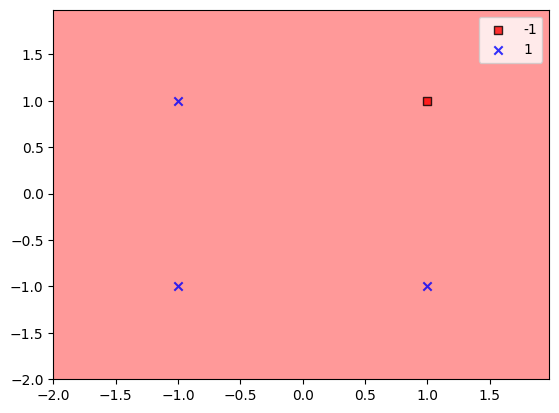

가중치 수정전 target :1, y:0, b:0, W:[0 0]
가중치 수정후 target :1, y:0, b:0.01, W:[-0.01 -0.01]


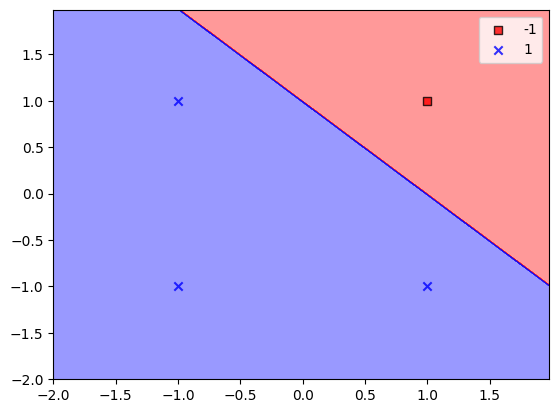

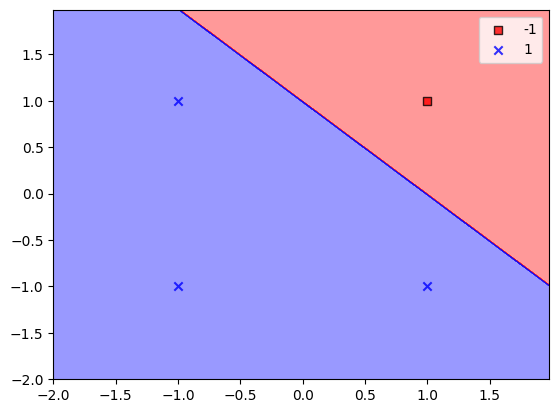

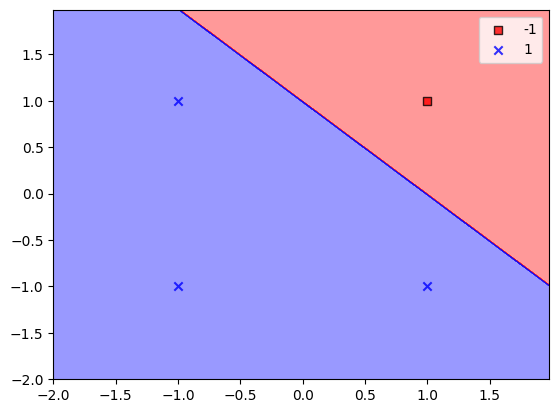

iteration --------- 0


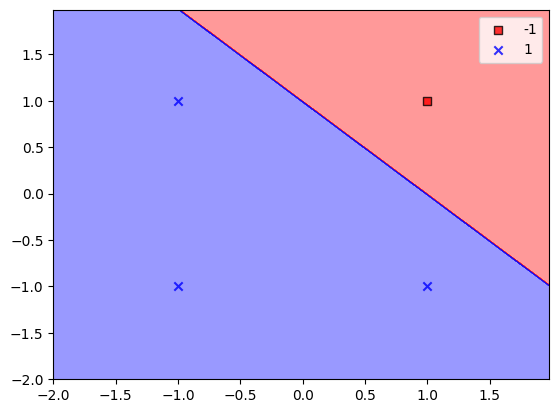

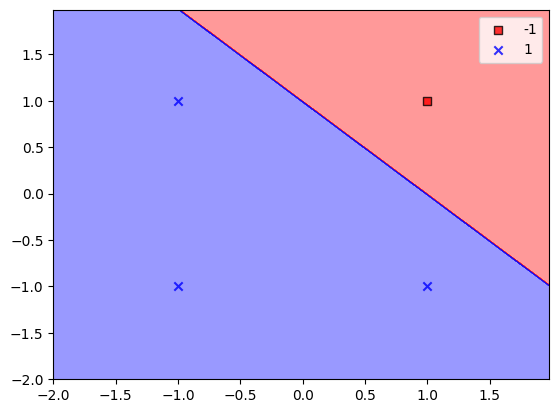

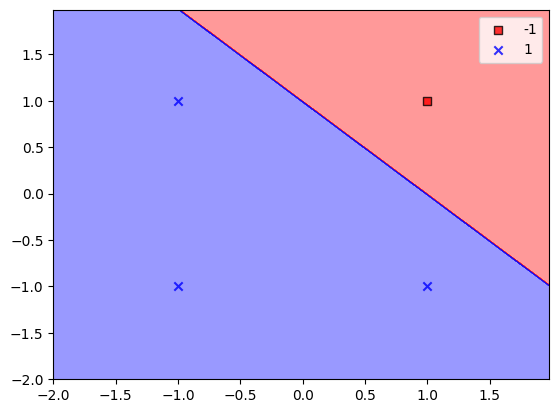

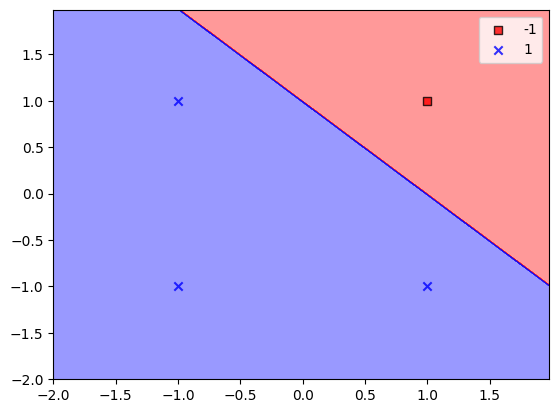

iteration --------- 1


In [31]:
W = np.array([0, 0])
b = 0
X_plot=np.array([[-1, -1],
            [-1, 1],
            [1, -1],
            [1, 1]])
y_plot=np.array([1, 1, 1, -1]) 

adjusted = 0
for i in range(100):
    adjusted += train_plot(-1,-1, 1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train_plot(-1, 1, 1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train_plot( 1,-1, 1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train_plot( 1, 1, -1, X_plot=X_plot, y_plot=y_plot)
    print('iteration ---------', i)
    if not adjusted: break
    adjusted = 0 # 다음 for문을 위해 초기화

# XOR

In [1]:
# W = np.array([0, 0])
# b = 0
# X_plot=np.array([[-1, -1],
#             [-1, 1],
#             [1, -1],
#             [1, 1]])
# y_plot=np.array([-1, 1, 1, -1]) 

# adjusted = 0
# for i in range(10):
#     adjusted += train_plot(-1,-1, -1, X_plot=X_plot, y_plot=y_plot)
#     adjusted += train_plot(-1, 1, 1, X_plot=X_plot, y_plot=y_plot)
#     adjusted += train_plot( 1,-1, 1, X_plot=X_plot, y_plot=y_plot)
#     adjusted += train_plot( 1, 1, -1, X_plot=X_plot, y_plot=y_plot)
#     print('iteration ---------', i)
#     if not adjusted: break
#     adjusted = 0 # 다음 for문을 위해 초기화

# 2일차

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

W = np.array([0, 0, 0, 0]) # 마지막 0은 b
learning_rate = 0.01

In [18]:


def plot_decision_regions_percept(X, y, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    plt.legend()
    plt.show()

def activation(s):
    if s > 0: return 1
    elif s < 0: return -1
    return 0

def out(polyX):
    return activation(W.dot(polyX))

def train(x0, x1, target, X_plot, y_plot):  # target은 정답
    global W
    polyX = np.array([x0, x1, x0*x1, 1]) # 1은 b
    y = out(polyX)

    plot_decision_regions_percept(X_plot, y_plot)

    if target == y: return False  # 정답이면 학습할 필요 없음
    else:
        print('가중치 수정전 target :{}, y:{}, W:{}'.format(target, y, W))
        W = W + learning_rate * polyX * target 
        print('가중치 수정후 target :{}, y:{}, W:{}'.format(target, y, W))
        return True

def predict(inputs):
    outputs = []
    for x in inputs:
        polyX = np.array([x[0], x[1], x[0]*x[1], 1])
        outputs.append(out(polyX))
    return np.array(outputs, dtype=float)

C:\Users\PC\AppData\Local\Temp\ipykernel_2544\2012698782.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\PC\AppData\Local\Temp\ipykernel_2544\2012698782.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


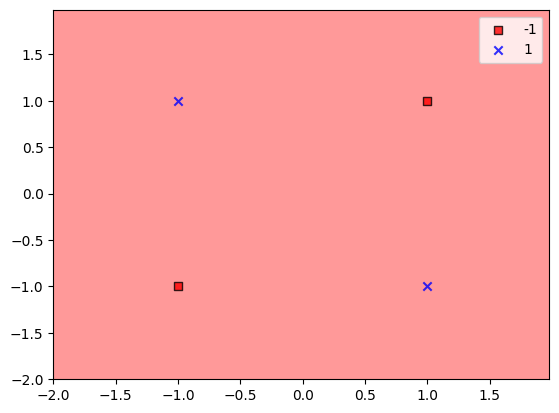

가중치 수정전 target :-1, y:0, W:[0 0 0 0]
가중치 수정후 target :-1, y:0, W:[ 0.01  0.01 -0.01 -0.01]


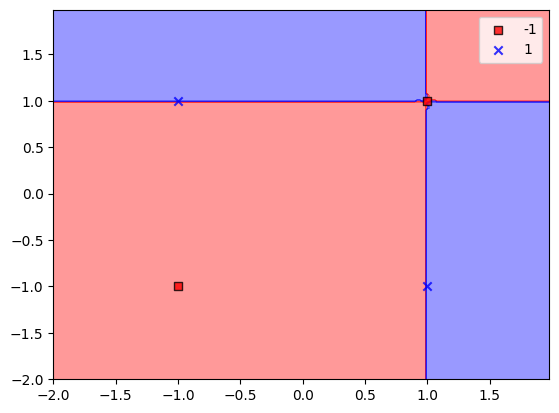

가중치 수정전 target :1, y:0, W:[ 0.01  0.01 -0.01 -0.01]
가중치 수정후 target :1, y:0, W:[ 0.    0.02 -0.02  0.  ]


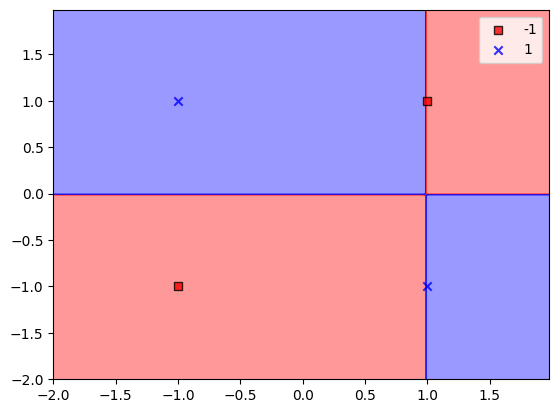

가중치 수정전 target :1, y:0, W:[ 0.    0.02 -0.02  0.  ]
가중치 수정후 target :1, y:0, W:[ 0.01  0.01 -0.03  0.01]


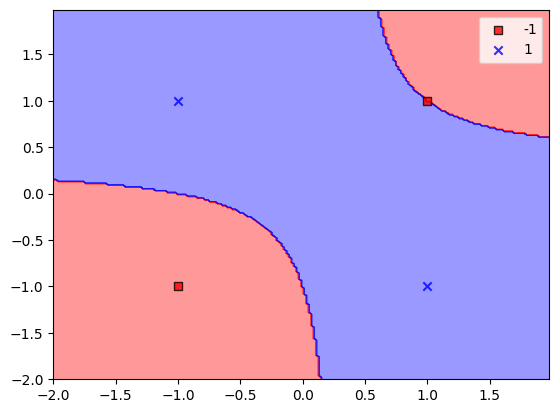

가중치 수정전 target :-1, y:1, W:[ 0.01  0.01 -0.03  0.01]
가중치 수정후 target :-1, y:1, W:[ 0.    0.   -0.04  0.  ]
iteration --------- 0


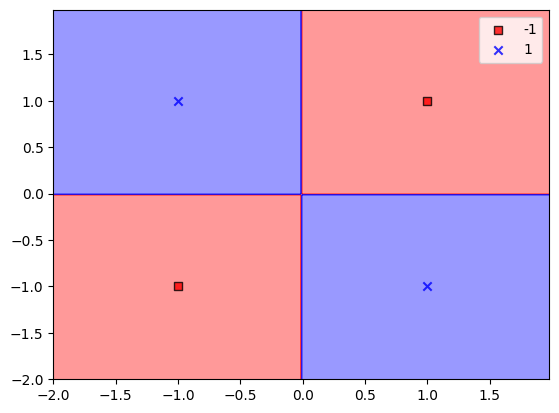

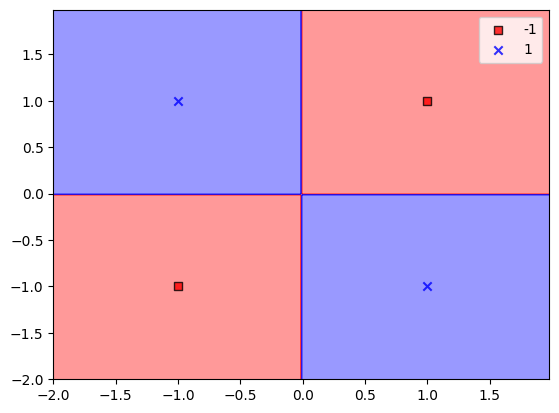

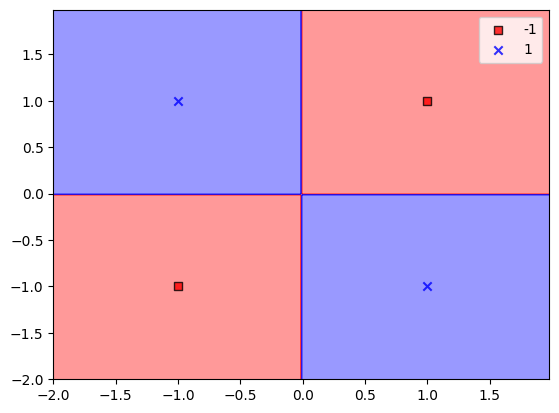

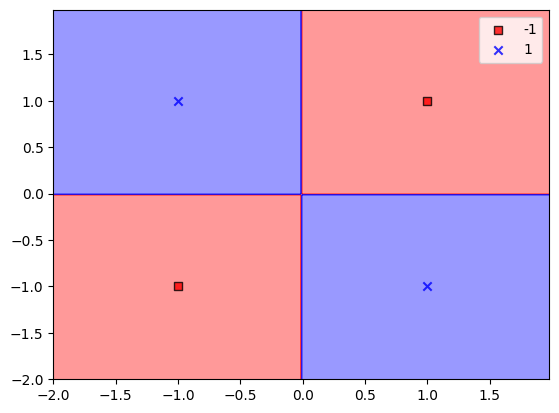

iteration --------- 1


In [20]:
W = np.array([0, 0, 0, 0])
X_plot=np.array([[-1, -1],
            [-1, 1],
            [1, -1],
            [1, 1]])
y_plot=np.array([-1, 1, 1, -1]) 

adjusted = 0
for i in range(10):
    adjusted += train(-1,-1, -1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train(-1, 1, 1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train( 1,-1, 1, X_plot=X_plot, y_plot=y_plot)
    adjusted += train( 1, 1, -1, X_plot=X_plot, y_plot=y_plot)
    print('iteration ---------', i)
    if not adjusted: break
    adjusted = 0 # 다음 for문을 위해 초기화

# 깊이(deep)는 차수, 넓이는 항수
# 그래서 deeplearning

# 경사하강법

# 오차 역전파

# 미분의 연쇄법칙

# 딥러닝에 자주 쓰이는 활성화 함수
* p259 sigmoid, tanh(sigmoid보다 자주 쓰임), linear unit(값에 영향을 안 줌, 신경X)
* sigmoid, tanh 기울기 소실
* ReLU(기울기 소실을 보완, 전해주거나 아니거나) -> ELU
* leaky ReLU (전해주거나 약하게 전해주거나)
* 요즘은 GELU로 많이 만듦. GPT도 GELU로